# Space-Filling Curves

In [388]:
%matplotlib inline
from scipy import *
from numpy import *
from bqplot import *
from pylab import *
import matplotlib.patches as patches
import bqplot.pyplot as plt
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
matplotlib.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
matplotlib.rcParams['figure.figsize'] = [8,6]

In [389]:
%%html
<style>
div.input {
    display:none;
}
</style>

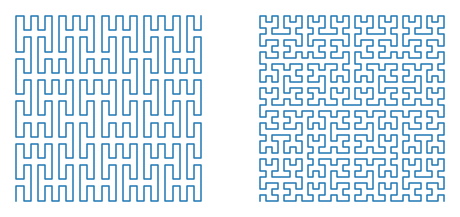

In [390]:
# top illustration
# Hilbert algorithm here from "Hilbert curve" wikipedia page

def d2xy(n, d):
    '''converts distance on line to x,y coordinates'''
    x = y = 0
    t = d
    s = 1
    while s < n:
        rx = 1 & (t//2)
        ry = 1 & (t ^ rx)
        x, y = rot(s, x, y, rx, ry)
        x += s * rx
        y += s * ry
        t //= 4
        s *= 2
    return x, y
        
def rot(n, x, y, rx, ry):
    if (ry == 0):
        if (rx == 1):
            x = n-1 - x
            y = n-1 - y  
        t = x
        x = y
        y = t
    return x, y

# put together path for n = 32
n = 32
xc = [0]
yc = [0]
for d in range(1, n**2 ):
    x,y = d2xy(n,d)
    xc.append(x)
    yc.append(y)

# attempt Peano curve: my code

xp0 = array([0,0,0,1,1,1,2,2,2])
yp0 = array([0,1,2,2,1,0,0,1,2])

def pearot(xn, yn, xx, yy, d = 3):
    if xx == 1:
        yn = d-1 - yn
        
    if yy == 1:
        xn = d-1 - xn
        
    return xn, yn

def Peano(n):
    '''implements Peano recursion'''
    d = n
    if n==3:
        return xp0, yp0
    else:
        xout = array([])
        yout = array([])
        d //= 3
        xn, yn = Peano(d)
        for im in range(9):
            xx = xp0[im]
            yy = yp0[im]
            #flip = dirp[im]
            xnew, ynew = pearot(xn,yn,xx,yy,d)
            xout = append(xout, d*xx + xnew)
            yout = append(yout, d*yy + ynew)
        return xout, yout
    
xp, yp = Peano(27)

fig, (ax1, ax2) = subplots(1, 2)
ax2.plot(xc,yc)
ax1.plot(xp,yp)

#ax = gca()
# force equal aspect ratio, remove spines and ticks
for ax in [ax1, ax2]:
    ax.set_aspect('equal', adjustable='box')
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    for item in ax.spines.values():
        item.set_visible(False)

## Cantor and Dimensional Confusion

A number of mathematically distressing developments occured in the latter part of the nineteenth century.  Weierstrass proved his continuous but nowhere differentiable function in 1872.  In 1873, the Russian-German mathematician Georg Cantor proved that rational numbers are *countable*, implying that almost all real numbers are *transcendental* -- disturbing, since transcendental numbers are so hard to find (and prove).

Then, Cantor asked the following question (taken from a letter to Richard Dedekind of January 5, 1874):

> Can a surface (say a square that includes the boundary) be uniquiely referred to a line (say a straight line segment that includes the end points) so that for every point on the sruface there is a corresponding point of the line and, converseley, for every point of the line there is a corresponding point of the surface?

In correspondence between the two mathematicians over 1874 - 1877, they (well, mostly Cantor) worked out the details, eventually proving that this could be done!  Each point in a square can be addressed by using a *single* number; using both an $x$ and $y$ coordinate is not necessary!  This introduces some confusion about the nature of dimensionality itself...

Skipping some of the historical confusion that they worked through, and phrasing in less unwieldy terminology than in the original, here's an outline of how to do this:

To go from the unit line segment the unit square:

Take a number on the unit line segment, and break its decimal representation into "atoms", $\alpha_i$, which are integer patterns either without zeros or including all preceding zeros.

For example, suppose the number chosen is $z = 0.12030045600007809.....$.  Then the atoms in this number are:  $\alpha_1 = 1$, $\alpha_2 = 2$, $\alpha_3 = 03$, $\alpha_4 = 004$, $\alpha_5 = 5$, $\alpha_6 = 6$, $\alpha_7 = 00007$, $\alpha_8 = 8$, $\alpha_9 = 09$, *etc.*  Then the point in the unit square associated with this number has coordinates:  $x = 0.\alpha_1\alpha_3\alpha_5\alpha_7\alpha_9...$ and $y = 0.\alpha_2\alpha_4\alpha_6\alpha_8\alpha_{10}...$.  In our example, then, the coordinates are:  $x = 0.10350000709...$ and $y = 0.200468...$.  (This use of "atoms" rather than merely the raw digits avoids some complications caused by numbers that can have finite digital representations...skipping details).

After proving this (and seeking Dedekind's experienced approval of his proof), Cantor wrote (letter to Dedekind of June 29, 1877)

> je le vois, mais je ne le crois pas

"I see it, but I do not believe it."

(As both were Germans, there correspondence was all in German, but for whatever reason, Cantor decided to express this in French, and as such it remains a famous quote in mathematics history...)

Dedekind then proposed the following theorem:

> If it is possible to establish a reciprocal, one-to-one, and onto correspondence between the points of a continuous manifold A of $a$ dimensions and the points of a continuous manifold B of $b$ dimensions, then this correspondence itself, if $a$ and $b$ are unequal, is necessarily utterly discontinuous

By 1878, four different mathematicians had proven this for manifolds of dimension not greater than three.  (The general case was not completely proven until 1911.)  The three important, intrinsic qualitites of any correspondence between a line segment and a square are its *injectivity* (one-to-one), its *surjectivity* (onto) and its continuity -- and according to this result, it cannot possess all three.  The above correspondence found by Cantor is both one-to-one and onto (*bijective*), and hence is discontinuous.

This begs the obvious question that leads to this week's curve:  Can one find a surjective (onto) and *continuous* (and hence, necessarily non-injective) mapping from the unit interval onto the unit square?


It was not until 1890 that the first such mapping was found, by Italian mathematician, logician and priest Giuseppe Peano.  (Peano was apparently responsible for introducing $\in$ as the set inclusion symbol as well as its reflection $\ni$ for the phrase "such that" into the set of math symbols).  How on earth he managed to think of this particular example is mysterious...

## The Peano Construction

Define the operator $k$ by $kt = 2 - t$ for $t \in {0, 1, 2}$, so that the $n^{th}$ iteration of $k$ is denoted $k^n$.  Note that $k^2t = k(kt) = k(2-t) = 2 - (2-t) = t$, so that $k^{2n}t = t$ and $k^{2n-1}t = 2-t$.  With this, if $k^nt = x$, then $t = k^nx$.

Now represent numbers $t \in I$ in base 3 (ternary) notation, so $t = 0_3t_1t_2t_3t_4t_5t_6...$ where all $t_i \in {0,1,2}$.

The mapping of interest, $f: I \rightarrow S$ is defined so that the $x$ component of the image has as its digits the cumulative even-numbered iterations of the ternary expansion of the odd-numbered places of $t$ and the $y$ component's digits have the cumulative odd-numbereed iterations of the teriary expansion of the even-numbered places of $t$.  Specifically,

$$ f(t) = (0_3t_1(k^{t_2}t_3)(k^{t_2+t_4}t_5)(k^{t_2+t_4+t_6}t_7)...,$$
$$ 0_3(k^{t_1}t_2)(k^{t_1+t_3}t_4)(^{t_1+t_3+t_5}t_6)... )$$
$$=(f_x(t), f_y(t))$$

Perhaps an example will help.  Let's find the image of the point $t = 0_31102100212... = 0.4736405...$, where $t_1=1$, $t_2=1$, $t_3=0$,$t_4=2$, $t_5=1$, $t_6=0$, $t_7=0$,$t_8=2$, $t_9=1$, $t_{10}=2$:

$$ f_x(t) = 0_31(k^10)(k^31)(k^30)(k^51)... = 0_31(k0)(k1)(k0)(k1)...$$
$$ = 0_312121...=0.62139...$$

and 

$$ f_y(t) = 0_3(k^11)(k^12)(k^22)(k^32)... = 0_3(k1)(k2)(2)(k2)... = 0_31020... = 0.4074...$$

So, in base 10, the correspondence is

$$ 0.4736405... \rightarrow (0.62139..., 0.4074...).$$

It is worth noting that even in the case of ambiguity of expression, *e.g.* expressing the number $\frac{1}{3}$ in ternary as either $0_310000...$ or as $0_30222222....$, this mapping leads to the same results, so it is well-defined.


### Surjectivity

To prove that this mapping is *onto*, we need to establish that for every point 

$$s = (0_3x_1x_2x_3x_4x_5x_6..., 0_3y_1y_2y_3y_4y_5y_6...) \in S$$

we can find a point $t = 0_3t_1t_2t_3t_4t_5t_6... \in I$ such that $f(t) = s$.  Applying the mapping, we require that

$$(0_3t_1(k^{t_2}t_3)(k^{t_2+t_4}t_5)(k^{t_2+t_4+t_6}t_7)..., 0_3(k^{t_1}t_2)(k^{t_1+t_3}t_4)(k^{t_1+t_3+t_5}t_6)...)$$
$$ = (0_3x_1x_2x_3x_4x_5x_6...,0_3y_1y_2y_3y_4y_5y_6...).$$

By matching up the coordinates, wee see that

$$t_1 = x_1,$$
$$k^{t_1}t_2 = y_1 \Rightarrow t_2 = k^{t_1}y_1,$$
$$k^{t_2}t_3 = x_2 \Rightarrow t_3 = k^{t_2}x_2, $$
$$k^{t_1+t_3}t_4 = y_2 \Rightarrow t_4 = k^{t_1+t_3}y_2,$$
$$k^{t_2+t_4}t_5 = x_3 \Rightarrow t_5 = k^{t_2+t_4}x_3,$$
$$k^{t_1+t_3+t_5}t_6 \Rightarrow t_6 = k^{t_1+t_3+t_5}y_3,$$
$$\vdots$$

and we have the ternary expansion of $t$.

### Continuity

For the sake of brevity, I'm going to skip this proof; it is a relatively straightforward but tedious example of analysis.  Peano included the proof in his paper.

### Non-injectivity

This is brief enough to include.  Suppose that $f(s) = f(t)$, where $ s = 0_3s_1s_2s_3...,$ and $t = 0_3t_1t_2t_3...$.
Then

$$ f(s) = f(t) \Rightarrow 0_3s_1(k^{s_2}s_3)(k^{s_2+s_4}s_5)(k^{s_2+s_4+s_6}s_7)... = 0_3t_1(k^{t_2}t_3)(k^{t_2+t_4}t_5)(k^{t_2+t_4+t_6}t_7)....$$

So, $s_1 = t_1$, but (for example) $k^{s_2}s_3 = k^{t_2}t_3 \Rightarrow s_3 = k^{s_2+t_2}t_3$, which means that these may be different and the same image point can originate from more than one object point.

### Non-differentiability

Peano included in the last line of his paper, the statement without proof that this mapping was everywhere continuous but nowhere differentiable.  The first proof of this was provided by E. H. Moore in 1900.  The book provides a proof, which is surprisingly both straightforward and succinct, but I omit it for brevity.

## Hilbert's Curve

Amazingly, German mathematician David Hilbert read Peano's paper and saw that the Peano Construction was inherently *geometrical*.  In 1891, he published his own variant of it, defined entirely geometrically.  This is now known as the **Hilbert Curve**, and is the first ever space-filling curve to be explicitly given.

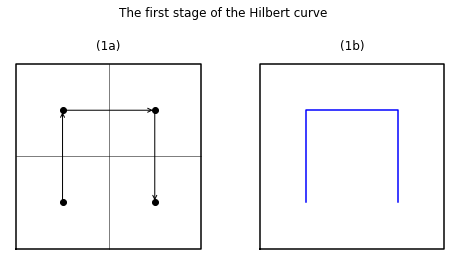

In [391]:
# create instructive example plots of Hilbert Curve
fig, (ax1, ax2) = subplots(1, 2)
fig.suptitle("The first stage of the Hilbert curve", y = 0.85)

# outer squares:
xSq = [0,0,1,1,0]
ySq = [0,1,1,0,0]
ax1.plot(xSq, ySq, 'k')
ax2.plot(xSq, ySq, 'k')


# left plot
# add subsquares
ax1.plot([0,1],[0.5,0.5],'k-', lw=0.5)
ax1.plot([0.5,0.5],[0,1],'k-', lw=0.5)
points = [(0.25, 0.25), (0.25, 0.75), (0.75, 0.75), (0.75, 0.25)]
for x,y in points:
    ax1.plot(x,y,'ko')
start_point = points[0]
for end_point in points[1:]:
    ax1.annotate("",xytext=start_point,xy=end_point, arrowprops={'arrowstyle': '->'})
    start_point = end_point
ax1.set_title(r"(1a)")

# right plot
xcurve = [item[0] for item in points]
ycurve = [item[1] for item in points]
ax2.plot(xcurve, ycurve,'b')
ax2.set_title(r"(1b)")

# force equal aspect ratio, remove spines and ticks
def format_axes(ax):
    ax.set_axis_off()
    ax.set_aspect('equal', adjustable='box')
    
for ax in [ax1, ax2]:
    format_axes(ax)


#### Stage 1

Divide the square into four congruent subsquares, locate their centers, and join them in the order shown above in figure (1a) to yield the first iteration of the curve (shown in blue in (1b)).  We now elaborate on this path in subsequent stages, always moving the starting and ending point closer to the lower two corners of the original square.


#### Stage 2

Now, divide each of the four subsquares into four more subsquares, so that the original square shows 16 little squares.  Locate the centers of each of these smaller subsquares.  Our curve must pass through each of these centers exactly once.  Starting with the center closest to the lower left corner, traverse the four centers in the lower left quadrant by using the shape generated in the previous stage rotated appropriately (as shown in figure (2a) below).  Each subsequent quadrant will have another copy of that same shape, rotated so as to preserve continuity of the curve.  The result is shown in (2b), which is tidied up to (2c).  (2d) shows the resulting shape with the previous stage superimposed in dotted line.

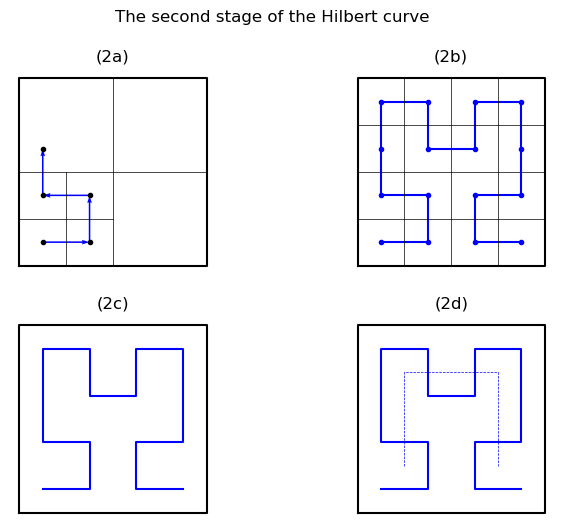

In [392]:
# stage 2 figures
matplotlib.rcParams['figure.dpi'] = 100
fig, [[ax1,ax2],[ax3,ax4]] = subplots(2, 2, squeeze = True)
fig.suptitle("The second stage of the Hilbert curve")
    
n = 4
# outer squares:
low, high = -0.5, n - 0.5
xSq = [low,low,high,high,low]
ySq = [low,high,high,low,low]

# install outer square in each of the four figures
for ax in [ax1, ax2, ax3, ax4]:
    ax.plot(xSq, ySq,'k')

xc = [0]
yc = [0]
for d in range(1, n+1 ):
    x,y = d2xy(n,d)
    xc.append(x)
    yc.append(y)
ax1.plot(xc, yc, 'k.')
xc = array(xc)
yc = array(yc)
ax1.quiver(xc[:-1], yc[:-1], xc[1:]-xc[:-1], yc[1:] - yc[:-1], scale_units = 'xy', angles = 'xy',scale = 1,
          color='blue')
# add subsquares
for ax in [ax1, ax2]:
    ax.plot([low,high],[1.5,1.5],'k-', lw=0.5)
    ax.plot([1.5,1.5],[low,high],'k-', lw=0.5)
    
ax1.plot([low,1.5],[0.5,0.5],'k-', lw=0.5)
ax1.plot([0.5,0.5],[low,1.5],'k-', lw=0.5)
ax1.set_title("(2a)")
#.set_xlim([-0.1,4.1])
#ax1.set_ylim([-0.1,4.1])

# next plot
xc = list(xc)
yc = list(yc)
for d in range(5, n**2):
    x,y = d2xy(n,d)
    xc.append(x)
    yc.append(y)
ax2.plot(xc, yc, 'b.-')
ax2.plot([low,high],[0.5,0.5],'k-', lw=0.5)
ax2.plot([0.5,0.5],[low,high],'k-', lw=0.5)
ax2.plot([low,high],[2.5,2.5],'k-', lw=0.5)
ax2.plot([02.5,02.5],[low,high],'k-', lw=0.5)
ax2.set_title("(2b)")

# plot 3
ax3.plot(xc, yc, 'b-')
ax3.set_title("(2c)")

# plot4
ax4.plot(xc, yc, 'b-')
xarr = array(xcurve)*4 - 0.5
yarr = array(ycurve)*4 - 0.5
ax4.plot(xarr, yarr, 'b--', lw=0.5)
ax4.set_title("(2d)")

for ax in [ax1,ax2,ax3,ax4]:
    format_axes(ax)

#### Stage 3

The steps from the previous stage are repeated; the subsquares are divided in two again, the starting point is located as the center of the subsquare nearest the lower left corner of the main square, and the pattern from stage 2 is fitted into the lower left quadrant in such a way that it exits into the upper left quadrant, as shown in figure (3a) below.  Repeating with subsequent quadrants results in figure (3b), on which is superimposed the outline (dotted) of the stage 2 curve.

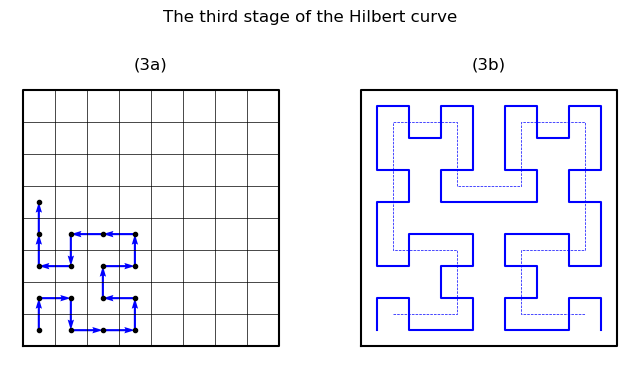

In [393]:
# stage 3 figures
matplotlib.rcParams['figure.dpi'] = 100
fig3, [ax31, ax32] = subplots(1, 2, squeeze = True)
fig3.suptitle("The third stage of the Hilbert curve", y =0.85)

    
n = 8
# outer squares:
low, high = -0.5, n - 0.5
x3Sq = [low,low,high,high,low]
y3Sq = [low,high,high,low,low]

# install outer square in each of the four figures
for ax in [ax31, ax32]:
    ax.plot(x3Sq, y3Sq,'k')

xc3 = [0]
yc3 = [0]
for d in range(1, 17 ):
    x,y = d2xy(n,d)
    xc3.append(x)
    yc3.append(y)
ax31.plot(xc3, yc3, 'k.')
xc3 = array(xc3)
yc3 = array(yc3)
ax31.quiver(xc3[:-1], yc3[:-1], xc3[1:]-xc3[:-1], yc3[1:] - yc3[:-1], scale_units = 'xy', angles = 'xy',scale = 1,
           color='blue')
# add subsquares
for dd in [1,2,3,4,5,6,7]:
    pos = dd - 0.5
    ax31.plot([low,high],[pos, pos],'k-', lw=0.5)
    ax31.plot([pos, pos],[low,high],'k-', lw=0.5)
    
ax31.set_title("(3a)")

# next plot
xc3 = list(xc3)
yc3 = list(yc3)
for d in range(17, n**2):
    x,y = d2xy(n,d)
    xc3.append(x)
    yc3.append(y)
ax32.plot(xc3, yc3, 'b-')
ax32.set_title("(3b)")

# add previous iteration
xarr3 = array(xc)*2 + 0.5
yarr3 = array(yc)*2 + 0.5
ax32.plot(xarr3, yarr3, 'b--', lw=0.5)

for ax in [ax31,ax32,ax33:
    format_axes(ax)

In [394]:
x0 = array([0,0,1,1])
y0 = array([0,1,1,0])

def rot4(xn, yn, xx, yy, d = 2):
    '''rotation for Hilbert curve'''
    # rotate only on bottom row:
    if yy == 0:
        # bottom right square inverts X and Y first
        if xx == 1:
            yn = d - yn - 1
            xn = d - xn - 1
        # exchange X and Y coordinates; rotate about X=Y
        t = xn
        xn = yn
        yn = t
    return xn, yn

def Hilbert(n, junk=0):
    '''generate Hilbert curve:
        n = 2**'''

    d = n
    if n==2:
        return x0, y0
    else:
        xout = array([])
        yout = array([])
        d //= 2
        xn, yn = myHil(d)
        for im in range(4):
            xx = x0[im]
            yy = y0[im]
            xnew, ynew = rot4(xn,yn,xx,yy,d)
            xout = append(xout, d*xx + xnew)
            yout = append(yout, d*yy + ynew)
        return xout, yout
    
#x, y = Hilbert(32)
#plot(x,y)



### Repeat

By repeating the above steps, we get the next three stages of the curve, as shown in figures (4a), (4b), and (4c) below:

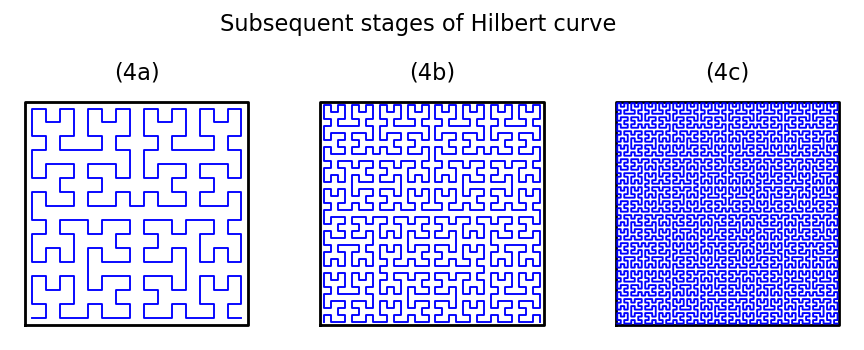

In [395]:
# subsequent generations figure

matplotlib.rcParams['figure.dpi'] = 135
fig4, axes = subplots(1, 3)
fig4.suptitle("Subsequent stages of Hilbert curve", y =0.75)

# outer squares:

for ax, n in zip(axes,[16, 32, 64]):
    x, y = Hilbert(n)
    low, high = -0.5, n - 0.5
    xSq = [low,low,high,high,low]
    ySq = [low,high,high,low,low]
    ax.plot(xSq, ySq, 'k')
    ax.plot(x,y,'b', lw=1)
    format_axes(ax)

for ax, letter in zip(axes, 'abc'):
    ax.set_title(f"(4{letter})")

What we have here is a purely geometrically defined process that generates an ever more closely-packed curve that progressively expands to the edges of the original square.

In the infinite limit, it is (*i.e.* it has been proven, but we will skip the proofs) continuous, surjective (every point in the square is hit), non-injective (some points in the square are hit by more than one point from the unit line) and non-differentiable everywhere.

## The Peano Curve

Hilbert's genius recognized Peano's construction as being *geometric* in nature.  Referring back to the Peano construction, first note that $f(0) = (0,0)$ and $f(1) = f_x(0_322222...), f_y(0_322222...) = (1,1)$, so the curve starts at the bottom left of the square and exits at the top right.  Next, observe that any number of the form $0_300t_3t_4t_5...$ gets mapped into coordinates of the form $(0_30\alpha_2\alpha_3\alpha_4..., 0_30\beta_2\beta_3\beta_4...)$, meaning that the subinterval $[0, \frac{1}{9}]$ gets mapped into the subsquare $[0,\frac{1}{3}] \times [0,\frac{1}{3}]$.  Similarly, since

$$f(0_3001t_3t_4t_5...) = \binom{0_30\alpha_2\alpha_3\alpha_4...}{0_31\beta_2\beta_3\beta_4...}$$

the subinterval $[\frac{1}{9}, \frac{2}{9}]$ is mapped into the subsquare $[0,\frac{1}{3}] \times [\frac{1}{3},\frac{2}{3}]$, and the subinterval $[\frac{2}{9}, \frac{23}{9}]$ is mapped into the subsquare $[0,\frac{1}{3}] \times [\frac{2}{3},1]$, *etc.*  In general, the subinterval $[\frac{1}{9}(n-1), \frac{1}{9}n]$ is mapped onto the subsquare $n$ as shown in figure (5a).  Since the curve is continuous, the centers of the squares are joined in this order, as shown in (5b) below, with the completed first iteration shown in (5c).


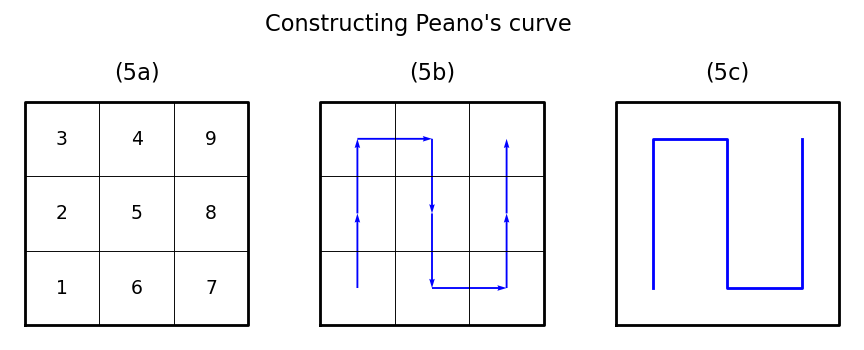

In [396]:
matplotlib.rcParams['figure.dpi'] = 135
fig5, axes = subplots(1, 3)
fig5.suptitle("Constructing Peano's curve", y =0.75)

n = 3
low, high = -0.5, n - 0.5
xpp, ypp = Peano(n)
xppa = array(xpp)
yppa = array(ypp)

# first plot
coords = [(0, 0.), (0.,1),(0.,2),(1,2),(1,1),(1,0),(2,0),(2,1),(2,2)]
for i, (x,y) in enumerate(coords):
    axes[0].text( x, y, f'{i+1}',ha='center', va = 'center')

axes[0].set_title("(5a)")
for dd in [1,2]:
    for ax in axes[:2]:
        pos = dd - 0.5
        ax.plot([low,high],[pos, pos],'k-', lw=0.5)
        ax.plot([pos, pos],[low,high],'k-', lw=0.5)
    
axes[1].quiver(xppa[:-1], yppa[:-1], xppa[1:]-xppa[:-1], yppa[1:] - yppa[:-1], scale_units = 'xy', angles = 'xy',scale = 1,
              color = 'blue')
axes[1].set_title("(5b)")

axes[2].plot(xpp, ypp, 'b')
axes[2].set_title("(5c)")
for ax in axes:
    xSq = [low,low,high,high,low]
    ySq = [low,high,high,low,low]
    ax.plot(xSq, ySq,'k')
    
    format_axes(ax)

### Dimensionality

These space-filling curves are very "crinkly" and reminiscent of fractals -- they share the property of self-similarity with fractals.  But they are not fractals, as in any finite iteration, the curves are unequivocally one dimensional (rather than having a fractional dimension).  In the limit of infinite iterations, they become a two-dimensional square.  There is no intermediate state.


You can explore both the Hilbert and Peano curves using the interactive tool below.  

First, a word on variants of the Peano Curve.  (Here I am leaving my main source, the book on curves, and using several Web resources which are identified below).  Based on the shape of the first iteration of the Peano Curve and the order in which the subsquares are entered and exited, there are different orientations possible.  Consider first where the curve must enter a subsquare, and where it must leave.  For each of the four possible directions there are two ways to get from one corner to the opposite one in an "S" motion.

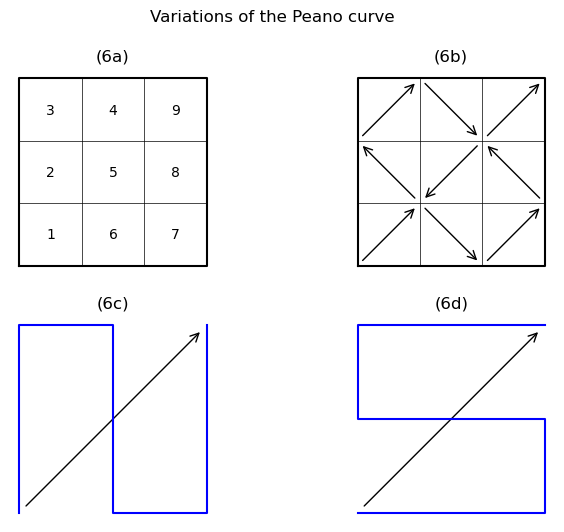

In [397]:
# Peano Variant explanation
matplotlib.rcParams['figure.dpi'] = 100
figV, [[axv1,axv2],[axv3,axv4]] = subplots(2, 2, squeeze = True)
figV.suptitle("Variations of the Peano curve")

# first plot
axv1.set_title("(6a)")
coords = [(0, 0.), (0.,1),(0.,2),(1,2),(1,1),(1,0),(2,0),(2,1),(2,2)]
for i, (x,y) in enumerate(coords):
    axv1.text( x, y, f'{i+1}',ha='center', va = 'center')

low, high = -0.5, n - 0.5
xSq = [low,low,high,high,low]
ySq = [low,high,high,low,low]
for ax in [axv1, axv2]:
    ax.plot(xSq, ySq,'k')
    for dd in [1,2]:
        pos = dd - 0.5
        ax.plot([low,high],[pos, pos],'k-', lw=0.5)
        ax.plot([pos, pos],[low,high],'k-', lw=0.5)
    
# add arrows to second plot
axv2.set_title("(6b)")
style = patches.ArrowStyle('->')
kw = dict(arrowstyle=style, color='k', mutation_scale=15)
arrows = []
# up right
arrows.append(patches.FancyArrowPatch((-0.45,-0.45), (0.45, 0.45),  **kw))
arrows.append(patches.FancyArrowPatch((-0.45,1.55), (0.45, 2.45),  **kw))
arrows.append(patches.FancyArrowPatch((1.55,1.55), (2.45, 2.45),  **kw))
arrows.append(patches.FancyArrowPatch((1.55,-0.45), (2.45, 0.45),  **kw))
# up left
arrows.append(patches.FancyArrowPatch((0.45, 0.55), (-0.45, 1.45), **kw))
arrows.append(patches.FancyArrowPatch((2.45, 0.55), (1.55, 1.45), **kw))
# down right
arrows.append(patches.FancyArrowPatch((0.55, 2.45), (1.45, 1.55), **kw))
arrows.append(patches.FancyArrowPatch((0.55, 0.45), (1.45, -0.45), **kw))
# down left
arrows.append(patches.FancyArrowPatch((1.45, 1.45), (0.55, 0.55), **kw))

for arrow in arrows:
    axv2.add_patch(arrow)

# figure c
axv3.set_title("(6c)")
axv3.plot(xppa, yppa, 'b')
long_a = patches.FancyArrowPatch((0.05,0.05), (1.95, 1.95),  **kw)
axv3.add_patch(long_a)

# figure d
axv4.set_title("(6d)")
axv4.plot(yppa, xppa, 'b')
long_b = patches.FancyArrowPatch((0.05,0.05), (1.95, 1.95),  **kw)
axv4.add_patch(long_b)

for ax in [axv1, axv2, axv3, axv4]:  
    format_axes(ax)

#### Number of Variations

For each of the 9 squares there are two alternative choices, leading to $2^9 = 512$ sequences defined by the 9-digit binary representations (*e.g.* $2 = 0_2000000010$ would mean flip the curve in box '2' but leave it unflipped in the other 8 boxes).  Of these, $2^4 \cdot 2 = 32$ are palindromic (in binary), leading to curves with the *same* central symmetry.  The remaining $480 = 512 - 32$ asymmetric curves come in pairs, each of which is related to each other by central symmetry with respect to the center of the unit square:  hence there are $480/2 + 32 = 272$ essentially distinct variations of the Peano curve.

In [398]:
# attempt Peano curve
# include variants in 'variant' number, num
# num & (power of 2) --> use variant version in this cell

# basic curve data
xp0 = array([0,0,0,1,1,1,2,2,2])
yp0 = array([0,1,2,2,1,0,0,1,2])

def is_rotated(im, var = 0):
    '''extracts im-th smallest binary digit from var'''
    out = False
    try:
        out = int(bin(var)[2:][-(im+1)])
    except IndexError:
        pass
    return out
        
def pearot2(xn, yn, im, d = 3, var = 0):
    xx = xp0[im]
    yy = yp0[im]
    flip = (is_rotated(im,var)  and d == 3)
    #print(im, var, d, flip)
    #print("    ", is_rotated(im,var), d==3)
    if flip:
        t = xn
        xn = yn
        yn = t 
        
    if xx == 1:
        yn = d-1 - yn
        
    if yy == 1:
        xn = d-1 - xn
        
    return xn, yn

def PeanoVar(n, var = 0):
    
    d = n
    if n==3:
        return xp0, yp0
    else:
        xout = array([])
        yout = array([])
        d //= 3
        xn, yn = PeanoVar(d,var)
        for im in range(9):
            xx = xp0[im]
            yy = yp0[im]
            xnew, ynew = pearot2(xn,yn,im,d,var)
            xout = append(xout, d*xx + xnew)
            yout = append(yout, d*yy + ynew)
        return xout, yout
    
#xp, yp = PeanoVar(9,3)
#plot(xp,yp)



## Explore space-filling curves

Use the controls below to select either Peano or Hilbert curves, then use the drop box to select the stage of the curve.  If Peano is selected, then the selection of variation number is enabled.  This allows selection of 512 variations, some of which (as explained above) are essentially the same.

In [399]:
# interactive space filling plot

fig_layout = widgets.Layout(height = "400px", width = "400px")
fig_margin_dict = dict(top=30, bottom = 30, left = 20, right = 10)

main_fig = plt.figure(title="Peano Curve", layout = fig_layout, fig_margin = fig_margin_dict)
xp, yp = Peano(9)
space_curve = plt.plot(xp,yp)
xax, yax = plt.axes()['x'], plt.axes()['y']
xax.num_ticks = 0
yax.num_ticks = 0
xax.visible = False
yax.visible = False

# curve selector
curve_choice = widgets.Dropdown(options = ['Peano', 'Hilbert'], value = 'Peano', description = "Curve: ")

# curve order, type selectors
curve_order = widgets.BoundedIntText(value = 2, min=1, max = 5, step = 1, description = "Order: ")
curve_variant = widgets.BoundedIntText(value = 0, min=0, max = 511, step = 1, description = "Variant: ")
choice_box = widgets.HBox([curve_order, curve_variant])

# callback
def update(change):
    name = curve_choice.value
    n = curve_order.value
    if name == "Peano":
        curve_variant.disabled=False
        curve_order.max = 5
        main_fig.title = "Peano Curve"
        plot_function = PeanoVar
        d = 3**n
        args = [d, curve_variant.value]
    else:
        curve_variant.disabled = True
        curve_order.max = 7
        main_fig.title = "Hilbert Curve"
        plot_function = Hilbert
        d = 2**n
        args = [d]
        
    xp, yp = plot_function(*args)
    space_curve.x = xp
    space_curve.y = yp
    
curve_order.observe(update, names = 'value')
curve_choice.observe(update, names = 'value')
curve_variant.observe(update, names = 'value')

widgets.VBox([main_fig, curve_choice, choice_box])

### Uses

Surprisingly enough, space-filling curves are actually useful!  Partly, this is due to the fact that they preserve locality; points that are close to each other on the unit square are likely to be close to each other on the curve as well.  

In the classic [Chinese Postman Problem](https://en.wikipedia.org/wiki/Route_inspection_problem), the goal is to find the shortes closed path that visits every edge of an undirected graph -- *i.e.* how can the postman deliver all the mail by walking the shortes route?  When there are many stops, finding an exact solution to this problem becomes *very* difficult.  But, by mapping the destinations onto a space-filling curve of the appropriate level, reasonably good approximate solutions are possible.

They have also seen applications in image processing and memory storage.



### Other sources

Besides the book "Curves for the Mathematically Curious," by Julian Havil, here are a couple more excellent sites for space-filling curves:

[Crinkly Curves in the American Scientist](https://www.americanscientist.org/article/crinkly-curves)

[All Peano Curves](https://www.cut-the-knot.org/Curriculum/Geometry/PeanoComplete.shtml)

#### Implementation notes:

As in previous notebooks, both ```matplotlib``` and ```bqplot``` are used for plotting, with the latter used for the interactive plot.  I eventually settled on recursive algorithms of my own devising to generate both the Hilbert and Peano curves (with variatons for the latter), but I started with (and still use for the top figure) an algorithm taken from the wikipedia page for the Hilbert curve that maps distance on the unit line into the unit square very efficiently.